<a href="https://colab.research.google.com/github/mdnawabali/NYC-Taxi-Trip-Time-Prediction/blob/main/NYC_taxi_trip_time_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : NYC taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City**


# **BUSINESS CONTEXT**
Task is to build a model that predicts the total ride duration of taxi trips in New York City. Primary dataset is the one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

The primary goal of this project is to build a fundamental machine learning model that can forecast the typical trip time and cost for a given pickup location, dropoff location, date, and time. In order to gain an advantage over competitors and give customers greater value, every company today must effectively use its data. Making critical business decisions now often involves using machine learning, and libraries like data prep and sklearn make it possible for anyone, regardless of coding proficiency or domain expertise, to create models. One of the most potent libraries for machine learning is called Scikit Learn.

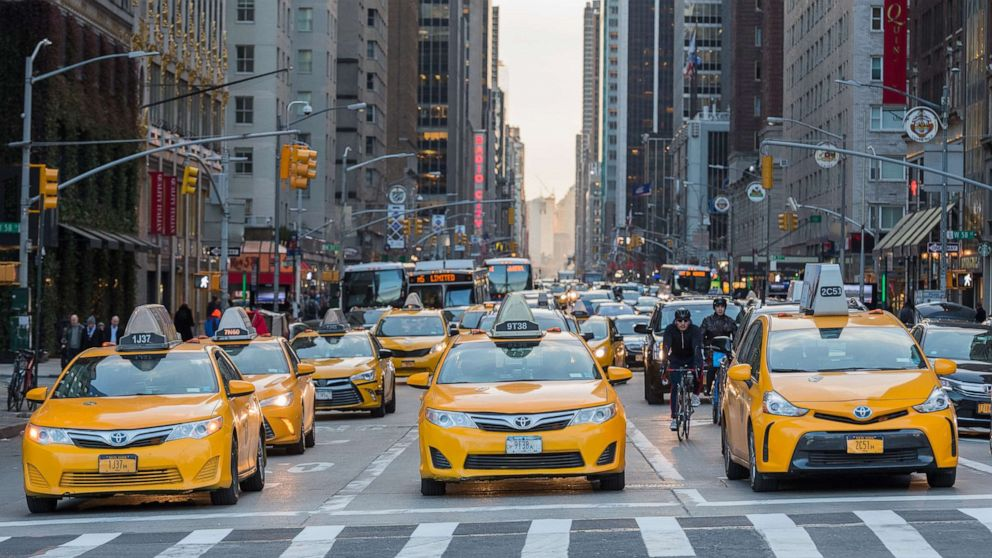

## **Understanding Dataset**
Importing necessary libraries and mounting drive

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math
import xgboost
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from datetime import datetime
import datetime
import warnings
warnings.filterwarnings("ignore")

In [5]:
# lets take a look at the data set
taxi_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone project 2/NYC Taxi Data.csv')
taxi_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


# **Column Details**


*   **Id**: A unique identifier for each trip
*   **Vendor Id**: A unique identifier for each trip

*   **Pickup Datetime**: A unique identifier for each trip
*   **Dropoff Datetime**: A unique identifier for each trip

*   **Passenger Count**: The number of passengers in the vehicle (driver entered value)
*   **Pickup Longitude**: The number of passengers in the vehicle (driver entered value)

*   **Pickup Latitude**: The latitude where the meter was engaged
*   **Dropoff Longitude**: The longitude where the meter was disengaged

*   **Dropoff Latitude**: The latitude where the meter was disengaged

*   **Store and Fwd Flag**: This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.
*   **Trip Duration**: Duration of time in seconds
















## **Preprocessing Of The Data**

In [6]:
# Determining shape of the dataset
rows=taxi_df.shape[0]
columns=taxi_df.shape[1]
print(f'Number of rows in dataset are {rows}')
print(f'Number of columns in dataset are {columns}')

Number of rows in dataset are 1458644
Number of columns in dataset are 11


In [7]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [8]:
# Numeric features decription
taxi_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


## Checking for presence of null values and also determing data types of the data present.

In [9]:
# Defining function to determine null values in dataset and datatype of the data
def brief():
  values=pd.DataFrame(index=taxi_df.columns)
  values['Null Count']= taxi_df.isnull().sum()
  values['Dtype']=taxi_df.dtypes
  return values 

In [10]:
brief()

,Null Count,Dtype
id,0,object
vendor_id,0,int64
pickup_datetime,0,object
dropoff_datetime,0,object
passenger_count,0,int64
pickup_longitude,0,float64
pickup_latitude,0,float64
dropoff_longitude,0,float64
dropoff_latitude,0,float64
store_and_fwd_flag,0,object


### As we can see that we do not have any null values in the dataset, therefore we can move forward with the dataset...

## In the given dataset pickup_datetime and dropoff_datetime are not in proper  date time format and we need to convert them into datetime format.

In [11]:
# Converting timestamp to datetime format
taxi_df['pickup_datetime']=pd.to_datetime(taxi_df['pickup_datetime'])
taxi_df['dropoff_datetime']=pd.to_datetime(taxi_df['dropoff_datetime'])
taxi_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [12]:
# Creating pickup and dropoff months
taxi_df['pickup_month'] = taxi_df['pickup_datetime'].dt.month
taxi_df['dropoff_month'] = taxi_df['dropoff_datetime'].dt.month

In [13]:
# Creating pickup and dropoff weekdays
taxi_df['pickup_weekday'] = taxi_df['pickup_datetime'].dt.weekday
taxi_df['dropoff_weekday'] = taxi_df['dropoff_datetime'].dt.weekday

In [14]:
# Creating pickup and dropoff hours
taxi_df['pickup_hour'] = taxi_df['pickup_datetime'].dt.hour
taxi_df['dropoff_hour'] = taxi_df['dropoff_datetime'].dt.hour

In [15]:
# Creating pickup and dropoff minutes
taxi_df['pickup_minute'] = taxi_df['pickup_datetime'].dt.minute
taxi_df['dropoff_minute'] = taxi_df['dropoff_datetime'].dt.minute

In [16]:
# Creating pickup and dropoff day
taxi_df['pickup_day'] = taxi_df['pickup_datetime'].dt.day
taxi_df['dropoff_day'] = taxi_df['dropoff_datetime'].dt.day

# **Feature Engineering**

## Creating new columns distance and speed for further analysis

In [17]:
# Creating the function for calculating distance between pickup and dropoff
from geopy.distance import geodesic
def distance_cal(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
  start_coordinates=(pickup_lat,pickup_long)
  stop_coordinates=(dropoff_lat,dropoff_long)
  return geodesic(start_coordinates,stop_coordinates).km

In [18]:
# Applying the function to our dataset and creating the feature ‘distance’.
taxi_df['distance'] = taxi_df.apply(lambda x: distance_cal(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

In [19]:
# Converting trip duration into hours
taxi_df['trip_duration_hour']=taxi_df['trip_duration']/3600

In [20]:
# Creating speed column
taxi_df['Speed']= (taxi_df.distance/(taxi_df.trip_duration/3600))

## **DATA VISUALIZATION**

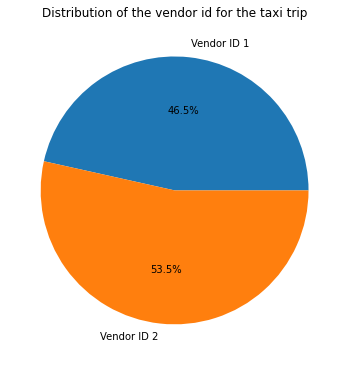

In [21]:
# Distribution of the vendor id for the taxi trip
(taxi_df['vendor_id'].value_counts() / taxi_df['vendor_id'].count()) * 100

# Percentage For Vendor_id Column
v1_pctg = abs(len(taxi_df[taxi_df['vendor_id'] == 1])/len(taxi_df)*100)
v2_pctg = abs(len(taxi_df[taxi_df['vendor_id'] == 2])/len(taxi_df)*100)
total_pctg = [v1_pctg, v2_pctg]

# Creating a pie chart
plt.figure(figsize = (6,8))
plt.pie(total_pctg, labels = ['Vendor ID 1','Vendor ID 2'], autopct = '%.1f%%')
plt.title('Distribution of the vendor id for the taxi trip')
plt.show()

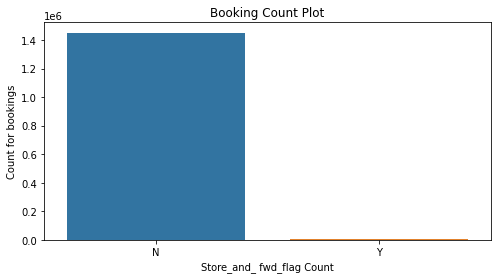

In [22]:
# Each store_and_ fwd_flag Count
taxi_df['store_and_fwd_flag'].value_counts()
plt.figure(figsize = (8, 4))
sns.countplot(taxi_df['store_and_fwd_flag'])
plt.title('Booking Count Plot')
plt.xlabel('Store_and_ fwd_flag Count')
plt.ylabel('Count for bookings')
plt.show()

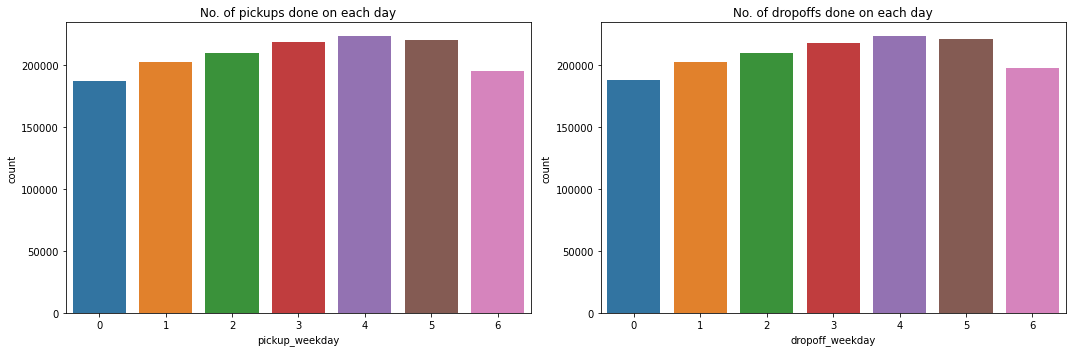

In [23]:
# Distribution of pickups and dropoffs on daily basis
figure, ax= plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.countplot(x='pickup_weekday', data = taxi_df, ax=ax[0])
ax[0].set_title('No. of pickups done on each day')

sns.countplot(x='dropoff_weekday', data = taxi_df, ax=ax[1])
ax[1].set_title('No. of dropoffs done on each day')

plt.tight_layout()

In [24]:
# Value count for each Month for pickup and dropoff
print('Pickup Month value counts')
taxi_df['pickup_month'].value_counts().sort_index()

print('Dropoff Month value counts')
taxi_df['dropoff_month'].value_counts().sort_index()

Pickup Month value counts
Dropoff Month value counts


1    229656
2    238292
3    256135
4    251636
5    248555
6    234243
7       127
Name: dropoff_month, dtype: int64

### We will subtract starting day from ending day and divide total datetime and convert the time difference into months

In [25]:
# Pickup data
total_pickup_datetime = taxi_df['pickup_datetime'].max() - taxi_df['pickup_datetime'].min()
total_pickup_datetime = total_pickup_datetime / np.timedelta64(1, 'M')
print('Total pickup datetime:',round(total_pickup_datetime,1))

# Dropoff data
total_dropoff_datetime = taxi_df['dropoff_datetime'].max() - taxi_df['dropoff_datetime'].min()
total_dropoff_datetime = total_dropoff_datetime / np.timedelta64(1, 'M')
print('Total dropoff datetime:',round(total_dropoff_datetime,1))

Total pickup datetime: 6.0
Total dropoff datetime: 6.0


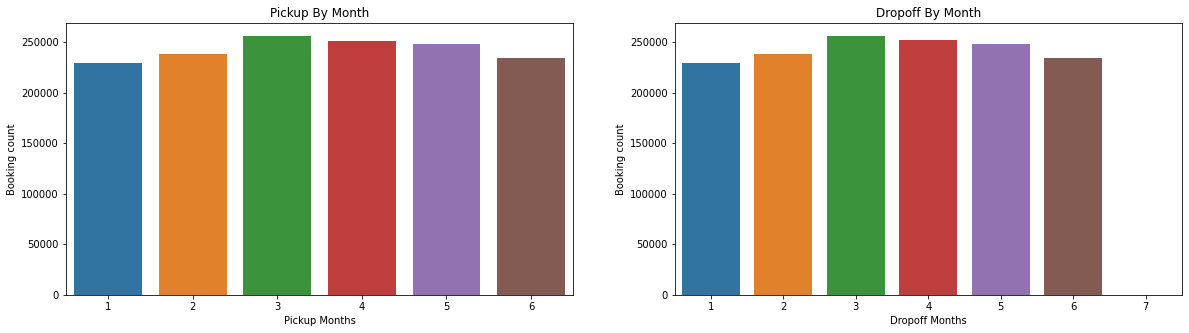

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20, 5))
# Pickup by month count
ax1.set_title('Pickup By Month')
ax = sns.countplot(x = 'pickup_month', data = taxi_df, ax = ax1)
ax.set_xlabel('Pickup Months')
ax.set_ylabel('Booking count')

# Droppoff by month count 
ax = sns.countplot(taxi_df['dropoff_month'],ax = ax2)
ax2.set_title('Dropoff By Month')
ax.set_xlabel('Dropoff Months')
ax.set_ylabel('Booking count')
plt.show()

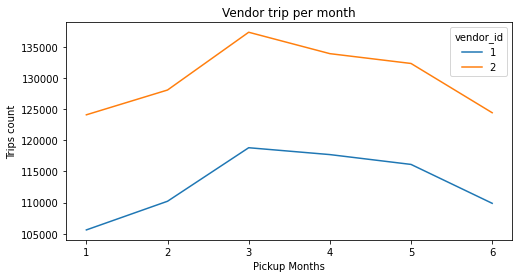

In [27]:
# Monthly trend for each vendor
monthly_pickup_vendor = taxi_df.groupby(['pickup_month', 'vendor_id']).size()
monthly_pickup_vendor = monthly_pickup_vendor.unstack()

monthly_pickup_vendor.plot(kind = 'line', figsize = (8,4))
plt.title('Vendor trip per month')
plt.xlabel('Pickup Months')
plt.ylabel('Trips count')

plt.show()

### Above plots interpret that in a week, "thursday", "friday", and "saturday" have higher number of pickups and dropoffs.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

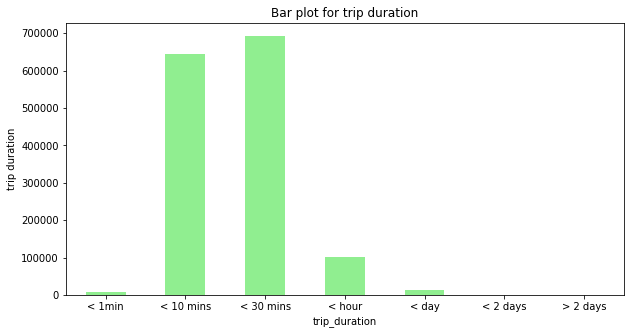

In [28]:
plt.figure(figsize=[10,5])
labels=['< 1min','< 10 mins','< 30 mins','< hour','< day','< 2 days','> 2 days']
taxi_df.groupby(pd.cut(taxi_df['trip_duration'],bins=[0,60,600,1800,3600,86400,86400*2,10000000],labels=labels))['trip_duration'].count().plot(kind='bar', color='lightgreen', fontsize=10)
plt.title("Bar plot for trip duration")
plt.ylabel("trip counts")
plt.ylabel("trip duration")
plt.xticks(rotation=0)

Text(0.5, 1.0, 'Distribution of total dropoff hour')

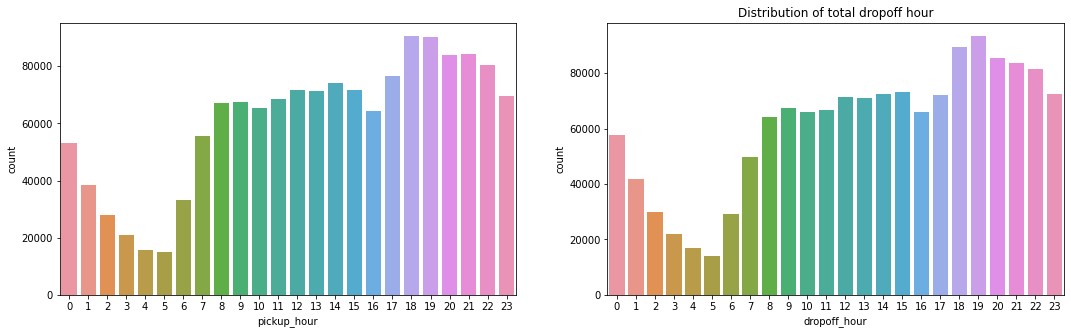

In [29]:
figure, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18,5))
taxi_df['pickup_hour'] = taxi_df['pickup_datetime'].dt.hour 
taxi_df['dropoff_hour'] = taxi_df['dropoff_datetime'].dt.hour 
sns.countplot(x = taxi_df['pickup_hour'], ax=ax[0] )
plt.title('Distribution of total pickup hour')

sns.countplot(x = taxi_df['dropoff_hour'], ax=ax[1])
plt.title('Distribution of total dropoff hour')

### Distribution of pickup and dropoff hours follows same pattern, it shows that most of the pickups and dropoffs are in the evening( x axis represesnts time in hrs, and peak is >15hr).

Text(0.5, 1.0, 'Distribution of passenger count')

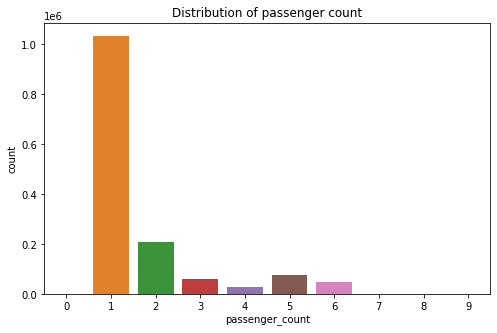

In [30]:
# Distribution of passenger count
plt.figure(figsize=(8,5))
ax=sns.countplot(x=taxi_df['passenger_count'])
plt.title('Distribution of passenger count')

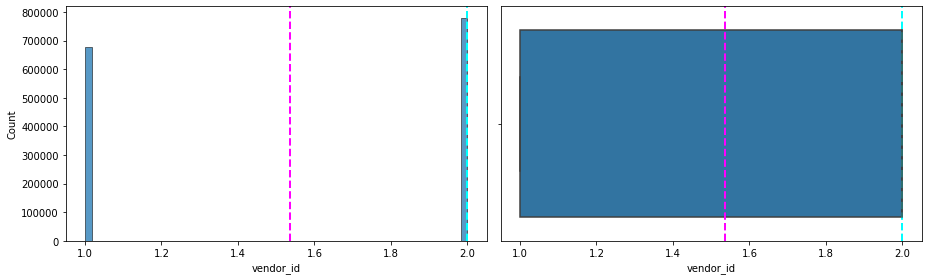

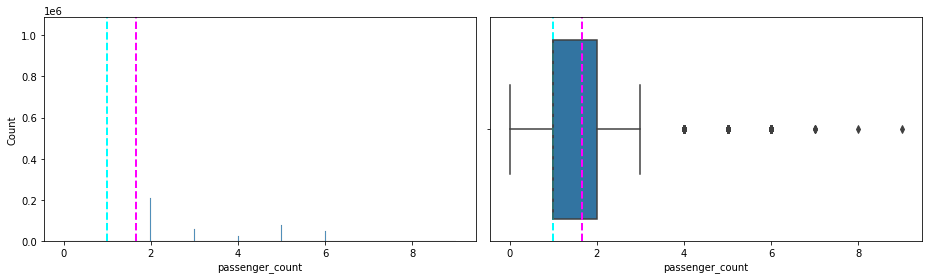

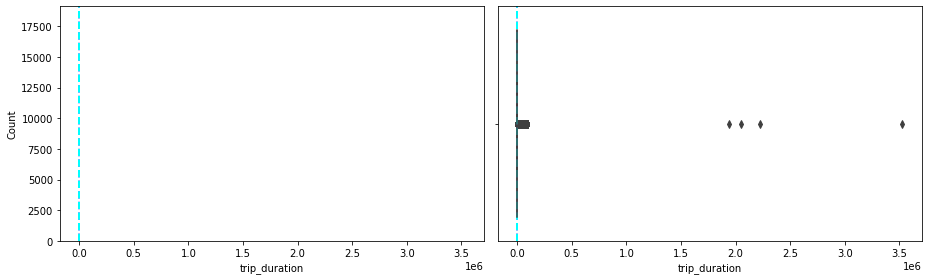

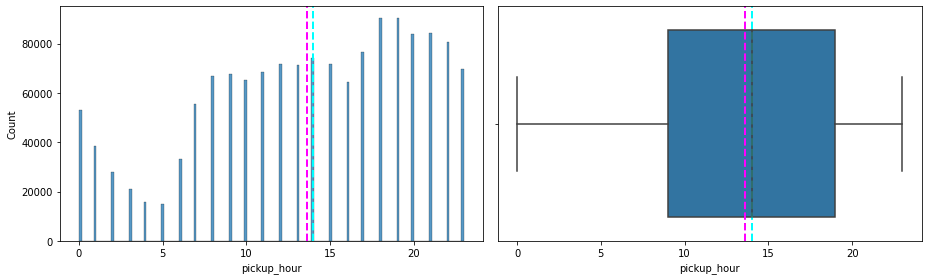

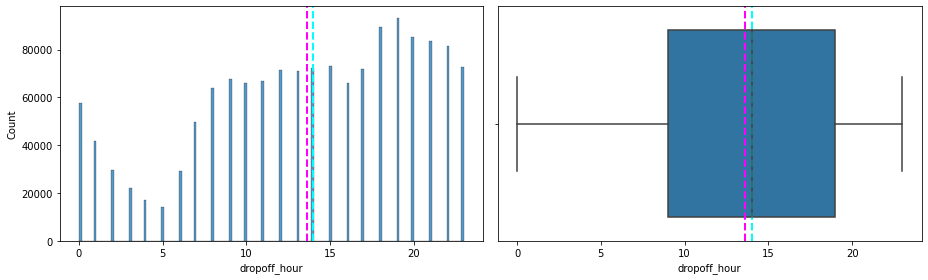

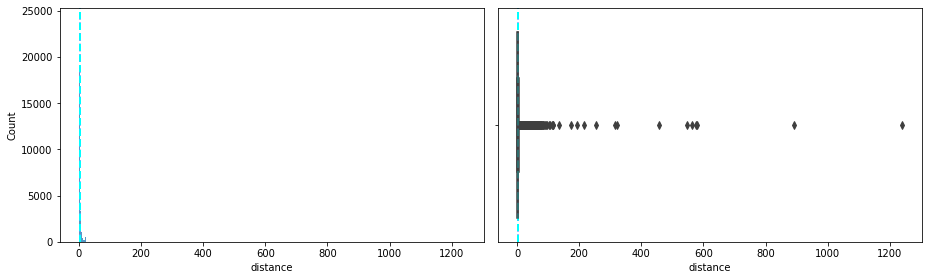

In [31]:
numeric_features = ['vendor_id', 'passenger_count', 'trip_duration', 'pickup_hour', 'dropoff_hour','distance']
numeric_features

for col in numeric_features:
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13,4))
  sns.histplot(data=taxi_df, x=col, ax=ax[0])
  ax[0].axvline(taxi_df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax[0].axvline(taxi_df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  sns.boxplot(data=taxi_df, x=col, ax=ax[1])
  ax[1].axvline(taxi_df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax[1].axvline(taxi_df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.tight_layout()

### **Determining correlation between independent variables**

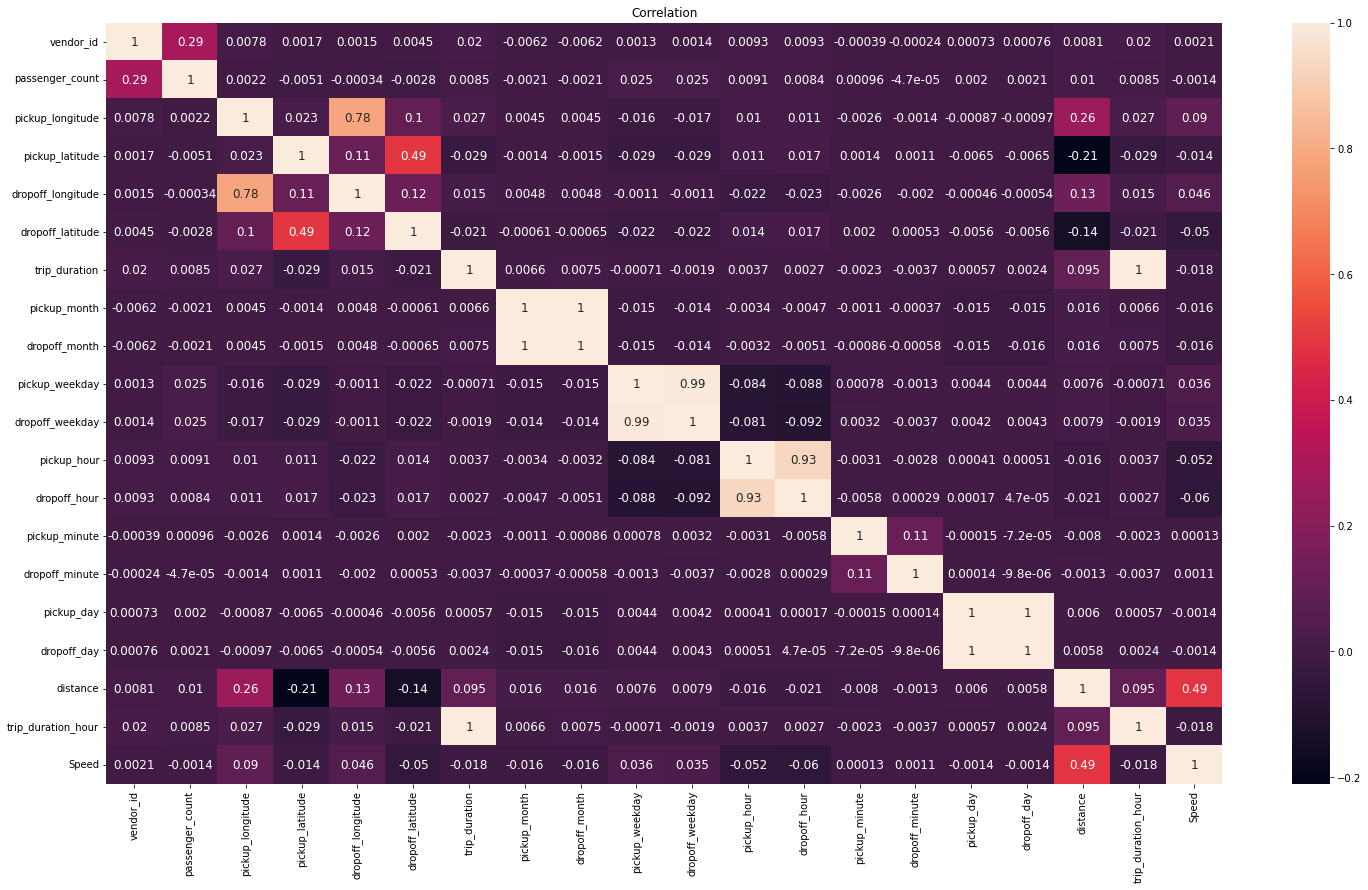

In [32]:
# Determining Correlation
plt.figure(figsize=(25,14))
correlation = taxi_df.corr()
sns.heatmap(correlation, annot=True, annot_kws={"size":12})
plt.title("Correlation")
plt.show()

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  # Calculating VIF
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return(vif)

In [34]:
calc_vif(taxi_df[[i for i in taxi_df.describe().columns if i not in ['trip_duration']]])

,variables,VIF
0,vendor_id,1.142020e+01
1,passenger_count,2.841165e+00
2,pickup_longitude,2.933773e+06
3,pickup_latitude,1.691619e+06
4,dropoff_longitude,2.738694e+06
5,dropoff_latitude,1.483252e+06
6,pickup_month,8.976757e+07
7,dropoff_month,8.978603e+07
8,pickup_weekday,2.880863e+02
9,dropoff_weekday,2.883773e+02


### Above heatmap clearly shows that  'dropoff_day', 'dropoff_hour', 'dropoff_month', 'dropoff_weekday' are highly correlated, so we need to drop them

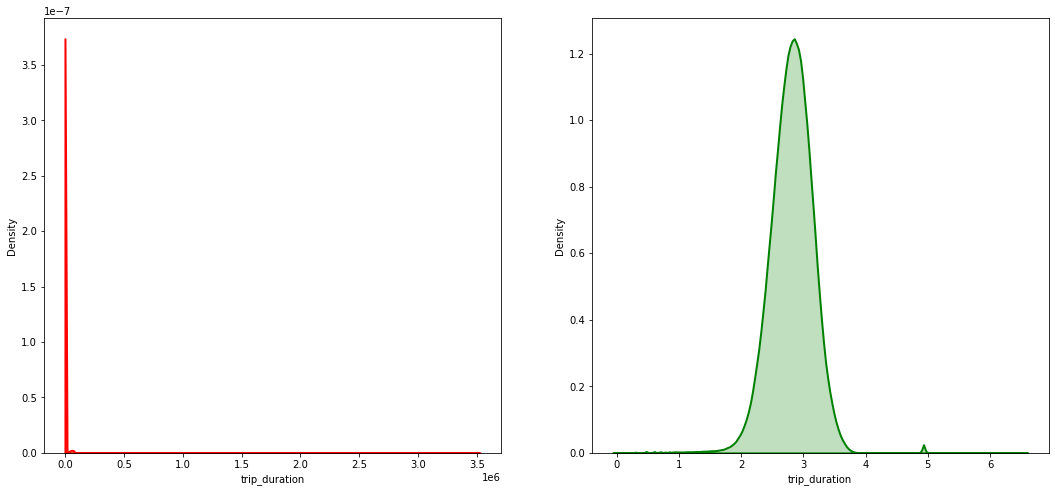

In [35]:
fig,ax=plt.subplots(1,2, figsize=(18,8))
sns.distplot(taxi_df.trip_duration, hist= False, kde= True, kde_kws= {'shade':True, 'linewidth':2}, label= 'non_normal', color='red', ax=ax[0])
sns.distplot(np.log10(taxi_df['trip_duration']), hist= False, kde= True, kde_kws={'shade':True, 'linewidth':2}, label='normal', color='green',ax=ax[1])

### Graph is positivley skewed so it needs to be regularized... we used log transformation to convert this into normal distribution

# **Outlier Removal** 
### Interquartile range measures the spread of the middle half of our data.
### Formula: Q3 - Q1
### where Q1- quartile 1 and Q3- quartile 3

### lower limit of the data is given by Q1-1.5*IQR
### upper limit of the data is given by Q3+1.5*IQR

### **We will be using percentile method to detect and remove outliers from the data**

In [36]:
# Assigning different quarters to distance column
distance_Q1=np.percentile(taxi_df['distance'], 25)
print(distance_Q1)
distance_Q2=np.percentile(taxi_df['distance'], 50)
print(distance_Q2)
distance_Q3=np.percentile(taxi_df['distance'], 75)
print(distance_Q3)

1.2322648420807965
2.0940451362496657
3.874716393714131


In [37]:
# Calculating IQR
IQR= distance_Q3 - distance_Q1
distance_lower_limit=distance_Q1 - 1.5*IQR
distance_upper_limit=distance_Q3 + 1.5*IQR
print("distance_lower_limit:", distance_lower_limit)
print("distance_upper_limit:", distance_upper_limit)

distance_lower_limit: -2.7314124853692054
distance_upper_limit: 7.838393721164133


In [38]:
# Removing outliers
taxi_df=taxi_df[taxi_df['distance']>distance_lower_limit]
taxi_df=taxi_df[taxi_df['distance']<distance_upper_limit]

In [39]:
# new shape of the dataset
taxi_df.shape

(1317869, 24)

In [40]:
# Assigning different quarters to trip duration column
trip_duration_Q1=np.percentile(taxi_df['trip_duration'], 25)
print(trip_duration_Q1)
trip_duration_Q2=np.percentile(taxi_df['trip_duration'], 50)
print(trip_duration_Q2)
trip_duration_Q3=np.percentile(taxi_df['trip_duration'], 75)
print(trip_duration_Q3)

373.0
605.0
931.0


In [41]:
# Calculating IQR
IQR= trip_duration_Q3 - trip_duration_Q1
trip_duration_lower_limit=trip_duration_Q1 - 1.5*IQR
trip_duration_upper_limit=trip_duration_Q3 + 1.5*IQR
print("trip_duration_lower_limit:", trip_duration_lower_limit)
print("trip_duration_upper_limit:", trip_duration_upper_limit)

trip_duration_lower_limit: -464.0
trip_duration_upper_limit: 1768.0


In [42]:
# Removing outliers
taxi_df=taxi_df[taxi_df['trip_duration']>0]
taxi_df=taxi_df[taxi_df['trip_duration']<trip_duration_upper_limit]

In [43]:
# new shape of the dataset
taxi_df.shape

(1277331, 24)

In [44]:
# Assigning different quarters to trip duration column
passenger_count_Q1=np.percentile(taxi_df['passenger_count'], 25)
print(passenger_count_Q1)
passenger_count_Q2=np.percentile(taxi_df['passenger_count'], 50)
print(passenger_count_Q2)
passenger_count_Q3=np.percentile(taxi_df['passenger_count'], 75)
print(passenger_count_Q3)

1.0
1.0
2.0


In [45]:
# Calculating IQR
IQR= passenger_count_Q3 - passenger_count_Q1
passenger_count_lower_limit=passenger_count_Q1 - 1.5*IQR
passenger_count_upper_limit=passenger_count_Q3 + 1.5*IQR
print("passenger_count_lower_limit:", passenger_count_lower_limit)
print("passenger_count_upper_limit:", passenger_count_upper_limit)

passenger_count_lower_limit: -0.5
passenger_count_upper_limit: 3.5


In [46]:
# Removing outliers
taxi_df=taxi_df[taxi_df['passenger_count']>0]
taxi_df=taxi_df[taxi_df['passenger_count']<passenger_count_upper_limit]

In [47]:
# new shape of the dataset
taxi_df.shape

(1142546, 24)

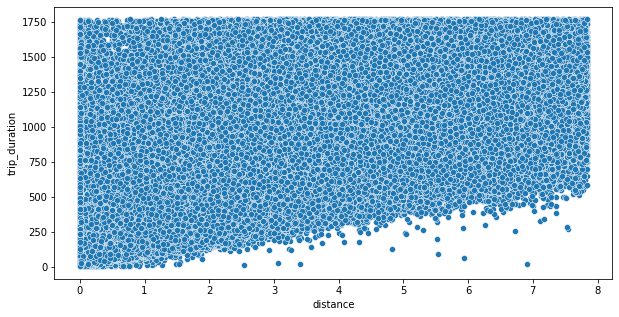

In [48]:
fig = plt.figure(figsize=(10, 5))
sns.scatterplot(x='distance',y='trip_duration',data=taxi_df)

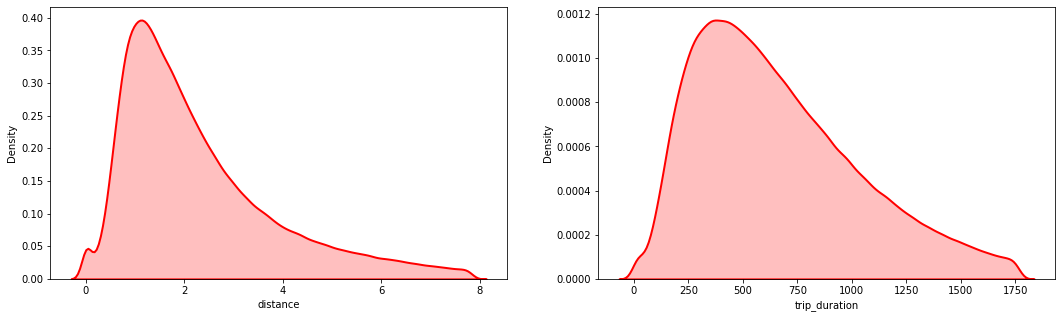

In [49]:
figure, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18,5))
sns.distplot(taxi_df['distance'], hist=False, kde=True, kde_kws= {'shade':True, 'linewidth':2}, color="red", ax=ax[0])
sns.distplot(taxi_df['trip_duration'], hist=False, kde=True, kde_kws= {'shade':True, 'linewidth':2}, color="red", ax=ax[1])

In [50]:
taxi_df=pd.get_dummies(taxi_df, columns=['store_and_fwd_flag', 'pickup_weekday', 'dropoff_weekday'])

In [51]:
taxi_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,...,pickup_weekday_4,pickup_weekday_5,pickup_weekday_6,dropoff_weekday_0,dropoff_weekday_1,dropoff_weekday_2,dropoff_weekday_3,dropoff_weekday_4,dropoff_weekday_5,dropoff_weekday_6
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,...,0,0,0,1,0,0,0,0,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663,...,0,0,1,0,0,0,0,0,0,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429,...,0,0,0,0,0,1,0,0,0,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435,...,0,1,0,0,0,0,0,0,1,0
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,1551,...,0,1,0,0,0,0,0,0,1,0


In [52]:
taxi_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration',
       'pickup_month', 'dropoff_month', 'pickup_hour', 'dropoff_hour',
       'pickup_minute', 'dropoff_minute', 'pickup_day', 'dropoff_day',
       'distance', 'trip_duration_hour', 'Speed', 'store_and_fwd_flag_N',
       'store_and_fwd_flag_Y', 'pickup_weekday_0', 'pickup_weekday_1',
       'pickup_weekday_2', 'pickup_weekday_3', 'pickup_weekday_4',
       'pickup_weekday_5', 'pickup_weekday_6', 'dropoff_weekday_0',
       'dropoff_weekday_1', 'dropoff_weekday_2', 'dropoff_weekday_3',
       'dropoff_weekday_4', 'dropoff_weekday_5', 'dropoff_weekday_6'],
      dtype='object')

In [53]:
features=['vendor_id', 'passenger_count', 'distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude',  'store_and_fwd_flag_N',  'store_and_fwd_flag_Y', 'pickup_weekday_0', 'pickup_weekday_1', 
          'pickup_weekday_2', 'pickup_weekday_3', 'pickup_weekday_4', 'pickup_weekday_5', 'pickup_weekday_6', 'dropoff_weekday_0', 'dropoff_weekday_1',
            'dropoff_weekday_2', 'dropoff_weekday_3', 'dropoff_weekday_4', 'dropoff_weekday_5', 'dropoff_weekday_6']

In [54]:
final_df=taxi_df[features]

## Evaluating which model is better. Therefore we will be calculating evaluation metrics for different models

In [55]:
from matplotlib import legend
# Defining a function to calculate evaluation metrics
def EM(x_train,y_train,y_predicted,disp="on"):
  ''' Takes different set of parameters and prints evaluation metrics '''
  MSE=round(mean_squared_error(y_true=y_train,y_pred=y_predicted),4)
  RMSE=(np.sqrt(MSE))
  R2=(r2_score(y_true=y_train,y_pred=y_predicted))
  Adjusted_R2=(1-(1-r2_score(y_train, y_predicted))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)))
  if disp=="on":
    print("Mean Squared Error:",MSE,"Root Mean Squared Error:", RMSE)
    print("R2 Score :",R2,"Adjusted R2 Score :",Adjusted_R2)

  #Plotting Actual and Predicted Values
  plt.figure(figsize=(18,6))
  plt.plot((y_predicted)[:100]) 
  plt.plot((np.array(y_train)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Time Duration')


  
  return (MSE,RMSE,R2,Adjusted_R2) 

In [56]:
#For Standarization  apply z-score
from scipy.stats import zscore

#Train test split
x = final_df[features].apply(zscore)[:100000]
y=taxi_df['trip_duration_hour'][:100000]

# Importing train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

## **LINEAR REGRESSION**

In [57]:
# Instantiate Linear Regression objects
regression = LinearRegression()
regression.fit(x_train, y_train)
regression.score(x_train, y_train)

y_pred_train = regression.predict(x_train)

y_pred_test = regression.predict(x_test)

Mean Squared Error: 0.0056 Root Mean Squared Error: 0.07483314773547883
R2 Score : 0.4931460252205201 Adjusted R2 Score : 0.4930002609734969


(0.0056, 0.07483314773547883, 0.4931460252205201, 0.4930002609734969)

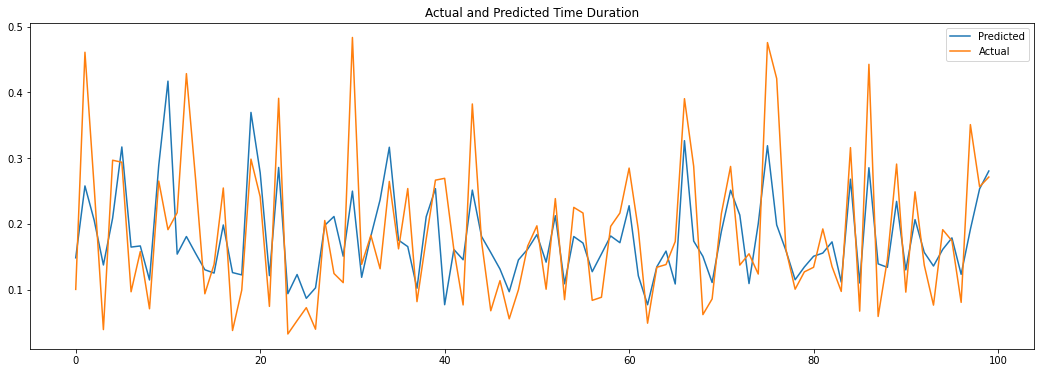

In [58]:
#Evaluation metrics for Train set
EM(x_train,y_train,y_pred_train)

Mean Squared Error: 0.0055 Root Mean Squared Error: 0.07416198487095663
R2 Score : 0.4949206180159178 Adjusted R2 Score : 0.49433907887967266


(0.0055, 0.07416198487095663, 0.4949206180159178, 0.49433907887967266)

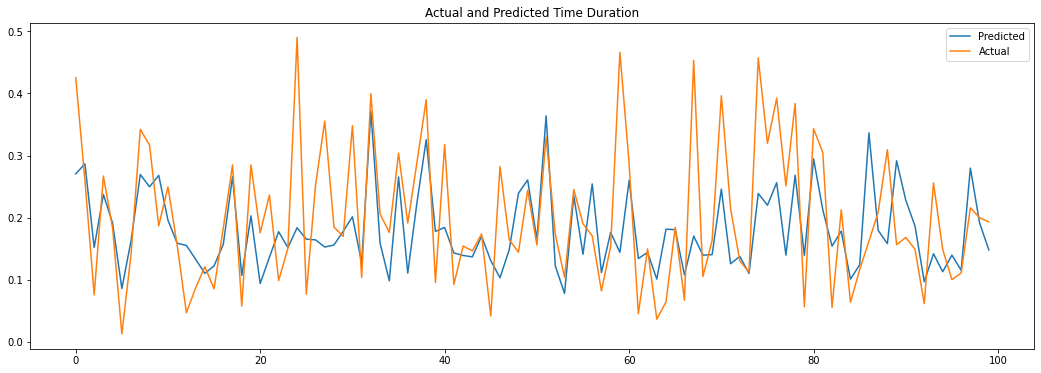

In [59]:
#Evaluation metrics for Test set
EM(x_test,y_test,y_pred_test)

## **DECISION TREE**

In [60]:
# Maximum depth of trees
max_depth = [4,6,8,10]

# Minimum number of samples required to split a node
min_samples_split = [10,20,30]

# Minimum number of samples required at each leaf node
min_samples_leaf = [10,16,20]

# Hyperparameter Grid
param_decision_tree = {
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}
decision_tree_model = DecisionTreeRegressor()

# Grid search
decision_tree_grid = GridSearchCV(estimator=decision_tree_model,
                       param_grid = param_decision_tree,
                       cv = 5, verbose=2, scoring='r2')

decision_tree_grid.fit(x_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=30; total time=   0.2s
[CV] END max_d

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [10, 16, 20],
                         'min_samples_split': [10, 20, 30]},
             scoring='r2', verbose=2)

In [61]:
decision_tree_grid.best_score_

0.5481218896669573

In [62]:
decision_tree_grid.best_estimator_

DecisionTreeRegressor(max_depth=10, min_samples_leaf=20, min_samples_split=10)

In [63]:
decision_tree_optimal_model =decision_tree_grid.best_estimator_

y_pred_decision_tree_test=decision_tree_optimal_model.predict(x_test)
y_pred_decision_tree_train=decision_tree_optimal_model.predict(x_train)
y_pred_decision_tree_test=decision_tree_optimal_model.predict(x_test)
y_pred_decision_tree_train=decision_tree_optimal_model.predict(x_train)

Mean Squared Error: 0.0046 Root Mean Squared Error: 0.06782329983125268
R2 Score : 0.5837502584340319 Adjusted R2 Score : 0.5836305507210179


(0.0046, 0.06782329983125268, 0.5837502584340319, 0.5836305507210179)

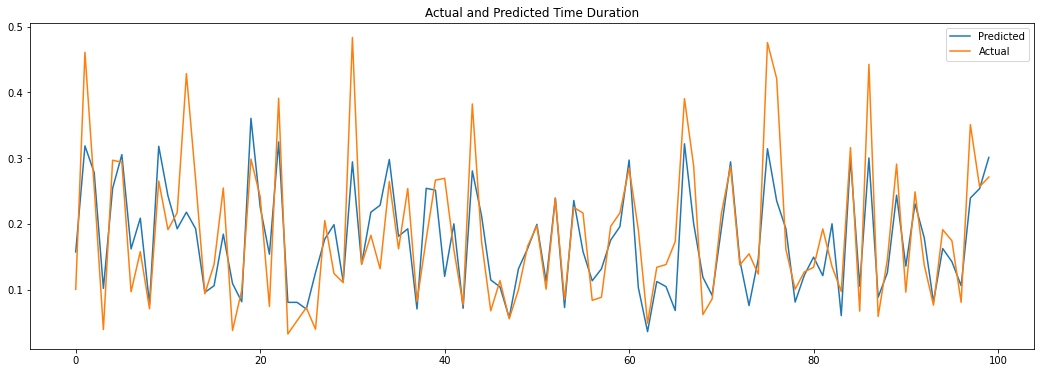

In [64]:
#Evaluation metrics for Train set
EM(x_train,y_train,y_pred_decision_tree_train) 

Mean Squared Error: 0.0049 Root Mean Squared Error: 0.06999999999999999
R2 Score : 0.5473462522714636 Adjusted R2 Score : 0.5468250750489088


(0.0049, 0.06999999999999999, 0.5473462522714636, 0.5468250750489088)

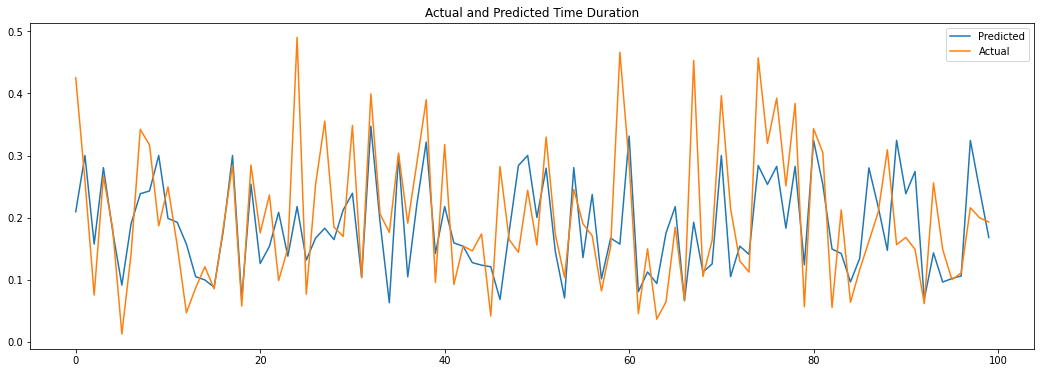

In [65]:
#Evaluation metrics for Test set
EM(x_test,y_test,y_pred_decision_tree_test) 

## **XG BOOST**

In [66]:
# Number of trees
total_estimators = [50,100,120]

# Maximum depth of trees
max_depth_of_trees = [5,7,9]
min_samples_split = [40,50]
#learning_rate=[0.1,0.3,0.5]

# Hyperparameter Grid
param_xgboost = {'total_estimators' : total_estimators,
              'max_depth' : max_depth_of_trees,
             'min_samples_split':min_samples_split
              }

In [67]:
# Instantiate  XGBRegressor
import xgboost as xgb
xgboost_model = xgb.XGBRegressor()

# Grid search
xgboost_grid = GridSearchCV(estimator=xgboost_model,param_grid = param_xgboost,cv = 3, verbose=2,scoring="r2")

xgboost_grid.fit(x_train,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[17:12:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=5, min_samples_split=40, total_estimators=50; total time=   8.2s
[17:13:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=5, min_samples_split=40, total_estimators=50; total time=   8.6s
[17:13:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=5, min_samples_split=40, total_estimators=50; total time=   7.4s
[17:13:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=5, min_samples_split=40, total_estimators=100; total time=   7.4s
[17:13:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecat

GridSearchCV(cv=3, estimator=XGBRegressor(),
             param_grid={'max_depth': [5, 7, 9], 'min_samples_split': [40, 50],
                         'total_estimators': [50, 100, 120]},
             scoring='r2', verbose=2)

In [68]:
xgboost_grid.best_score_

0.6028953537725884

In [69]:
xgboost_grid.best_params_

{'max_depth': 9, 'min_samples_split': 40, 'total_estimators': 50}

In [70]:
xgboost_optimal_model =xgboost_grid.best_estimator_

In [71]:
y_pred_xgboost_test=xgboost_optimal_model.predict(x_test)
y_pred_xgboost_train=xgboost_optimal_model.predict(x_train)

Mean Squared Error: 0.0031 Root Mean Squared Error: 0.055677643628300216
R2 Score : 0.7188136560323076 Adjusted R2 Score : 0.7187327906988169


(0.0031, 0.055677643628300216, 0.7188136560323076, 0.7187327906988169)

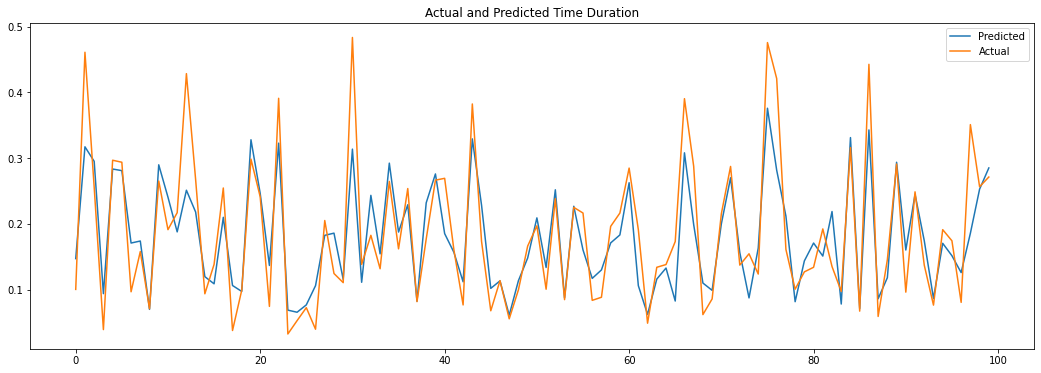

In [72]:
#Evaluation metrics for Train set
EM(x_train,y_train,y_pred_xgboost_train)

Mean Squared Error: 0.0043 Root Mean Squared Error: 0.06557438524302
R2 Score : 0.6055772672598317 Adjusted R2 Score : 0.6051231361598606


(0.0043, 0.06557438524302, 0.6055772672598317, 0.6051231361598606)

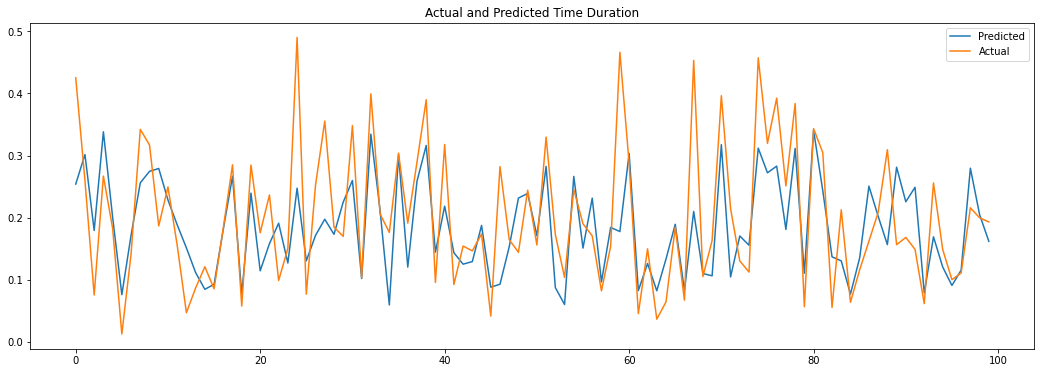

In [73]:
# Evaluation metrics for Test set
EM(x_test,y_test,y_pred_xgboost_test) 

## **GRADIENT BOOST**

In [74]:
# Number of trees
gradient_boost_estimators = [100]

# Maximum depth of trees
maximum_depth_gb = [5,8,10]

# Minimum number of samples required to split a node
minimum_samples_split_gb = [50,80]

# Minimum number of samples required at each leaf node
minimum_samples_leaf_gb = [40,50]

# HYperparameter Grid
param_gradient_boost = {'N_estimators' : gradient_boost_estimators,
              'maximum_depth_gb' : maximum_depth_gb,
              'minimum_samples_split_gb' : minimum_samples_split_gb,
              'minimum_samples_leaf_gb' : minimum_samples_leaf_gb}

In [75]:
# Create an instance of the  GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
gradient_boost_model=GradientBoostingRegressor()
gradient_boost_model.fit(x_train,y_train)

GradientBoostingRegressor()

In [76]:
y_preds_gradient_boost_test = gradient_boost_model.predict(x_test)
y_pred_gradient_boost_train=gradient_boost_model.predict(x_train)

Mean Squared Error: 0.0047 Root Mean Squared Error: 0.06855654600401044
R2 Score : 0.5724223219451227 Adjusted R2 Score : 0.5722993564730403


(0.0047, 0.06855654600401044, 0.5724223219451227, 0.5722993564730403)

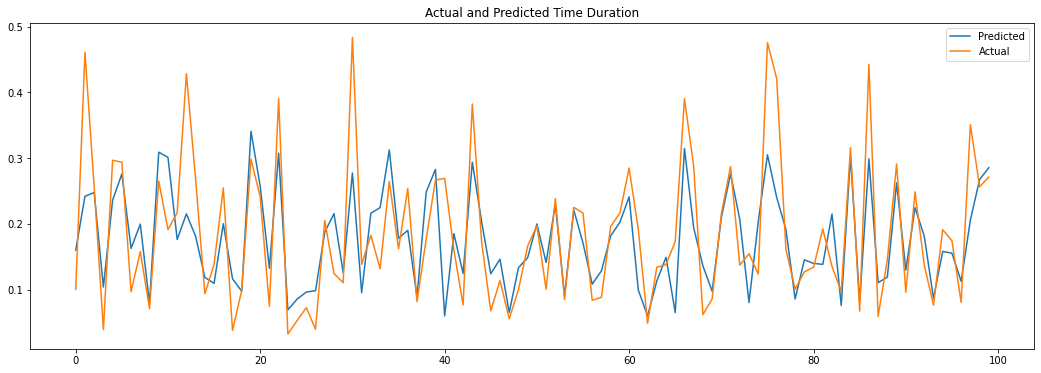

In [77]:
#Evaluation metrics for Train set
EM(x_train,y_train,y_pred_gradient_boost_train)

Mean Squared Error: 0.0047 Root Mean Squared Error: 0.06855654600401044
R2 Score : 0.5638441485282937 Adjusted R2 Score : 0.5633419666808843


(0.0047, 0.06855654600401044, 0.5638441485282937, 0.5633419666808843)

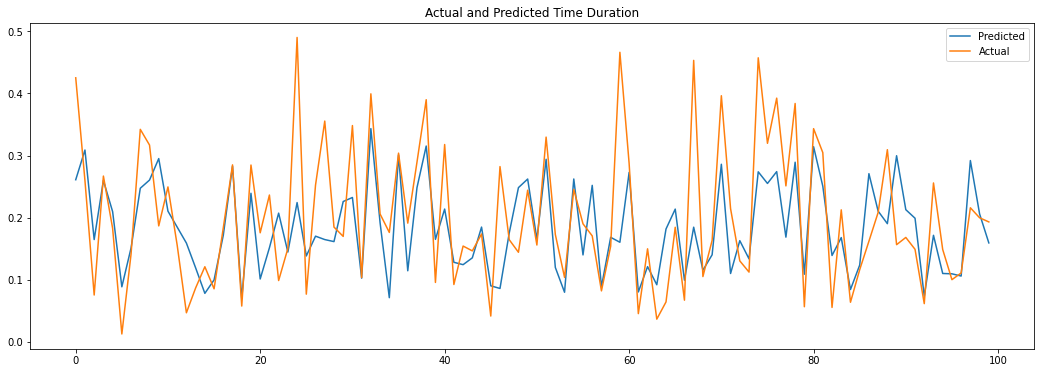

In [78]:
#Evaluation metrics for Test set
EM(x_test,y_test,y_preds_gradient_boost_test)

### Comparing evaluation metrics of different models

In [79]:
# initialize list of lists
data = [[0.0056, 0.07483314773547883, 0.4931460252205201, 0.4930002609734969 ], [0.0046, 0.06782329983125268, 0.5837502584340319, 0.5836305507210179 ], 
        [0.003, 0.05477225575051661, 0.7305107557345651, 0.7304332543264165], [0.0047, 0.06855654600401044, 0.5638441485282937, 0.5633419666808843]]
    
# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['MSE', 'RMSE', 'R2', 'AdR2'], index=['Linear Regression', 'Decision Tree', 'XgBoost', 'Gradient Boost'])
df

,MSE,RMSE,R2,AdR2
Linear Regression,0.0056,0.074833,0.493146,0.493000
Decision Tree,0.0046,0.067823,0.583750,0.583631
XgBoost,0.0030,0.054772,0.730511,0.730433
Gradient Boost,0.0047,0.068557,0.563844,0.563342


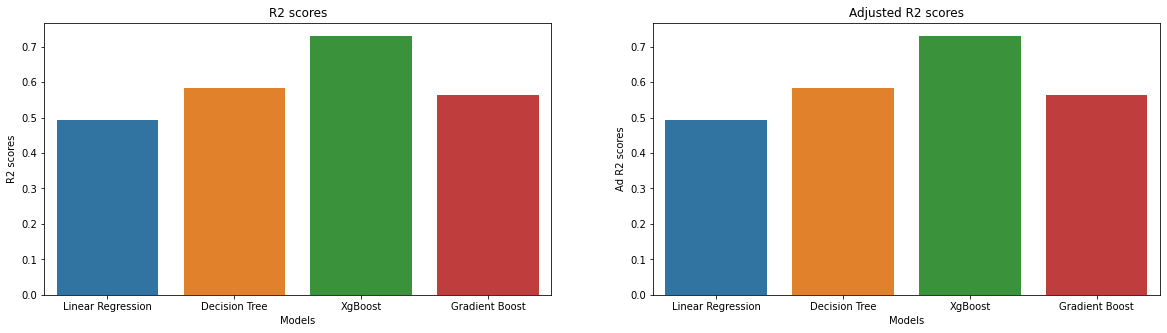

In [80]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20, 5))
x_= ['Linear Regression', 'Decision Tree', 'XgBoost', 'Gradient Boost']
# Pickup by month count
ax1.set_title('R2 scores')
ax = sns.barplot(x = x_, y='R2', data = df, ax = ax1)
ax.set_xlabel('Models')
ax.set_ylabel('R2 scores')

# Droppoff by month count 
ax = sns.barplot(x = x_, y='AdR2',  data = df, ax = ax2)
ax2.set_title('Adjusted R2 scores')
ax.set_xlabel('Models')
ax.set_ylabel('Ad R2 scores')
plt.show()

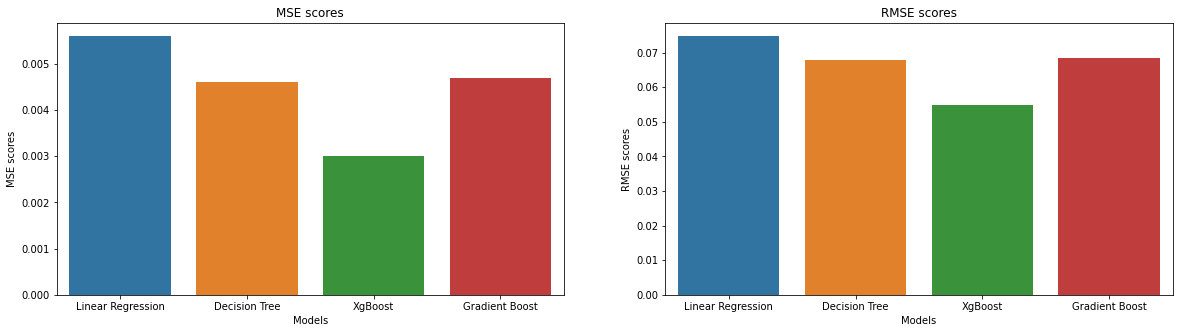

In [81]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20, 5))
x_= ['Linear Regression', 'Decision Tree', 'XgBoost', 'Gradient Boost']
# Pickup by month count
ax1.set_title('MSE scores')
ax = sns.barplot(x = x_, y='MSE', data = df, ax = ax1)
ax.set_xlabel('Models')
ax.set_ylabel('MSE scores')

# Droppoff by month count 
ax = sns.barplot(x = x_, y='RMSE',  data = df, ax = ax2)
ax2.set_title('RMSE scores')
ax.set_xlabel('Models')
ax.set_ylabel('RMSE scores')
plt.show()